# Exercise - Breast Cancer Diagnosis

Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (patient doesn't have breast cancer) or malignant (patient has breast cancer). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.


In this exercise, you will be analyzing ultrasound data of breast cancer tumors. Several characteristics of the tumor are given in the dataset and you will create a model that will predict whether or not a patient has a positive breast cancer diagnosis based off of the tumor characteristics.

This data set contains the following features:

* id (patientid)
* name
* radius (the distance from the center to the circumference of the tumor)
* texture (standard deviation of gray-scale values)
* perimeter (circumference of the tumor, approx. 2*3.14 *radius)
* area
* smoothness (local variation in radius lengths)
* compactness
* concavity (severity of concave portions of the contour)
* symmetry
* fractal_dimension
* age
* diagnosis: 1 if patient has breast cancer (melignant tumor) , 0 if patient does not have breast cancer (benign tumor)

## Data PreProcessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read in the breastcancer.csv file and set it to a data frame called ad_data.**

In [2]:
c_data = pd.read_csv('breastcancer.csv')

**Check the head of c_data**

In [3]:
c_data.head()

,id,name,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,ID842302,Glynnis Munson,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,ID842517,Lana Behrer,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,ID84300903,Devondra Vanvalkenburgh,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,ID84348301,Glory Maravalle,NaN,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,ID84358402,Mellie Mccurdy,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


We start by checking if the dataset has missing values and the results show that only the `radius` column has null values.

In [4]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    object 
 1   name               569 non-null    object 
 2   radius             498 non-null    float64
 3   texture            569 non-null    float64
 4   perimeter          569 non-null    float64
 5   area               569 non-null    float64
 6   smoothness         569 non-null    float64
 7   compactness        569 non-null    float64
 8   concavity          569 non-null    float64
 9   symmetry           569 non-null    float64
 10  fractal_dimension  569 non-null    float64
 11  age                569 non-null    int64  
 12  diagnosis          569 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 57.9+ KB


In [5]:
c_data.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
count,498.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.326635,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.181162,0.062798,39.467487,0.372583
std,3.506881,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.027414,0.007060,13.604683,0.483918
min,7.760000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.106000,0.049960,16.000000,0.000000
25%,11.817500,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.161900,0.057700,27.000000,0.000000
50%,13.465000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.179200,0.061540,40.000000,0.000000
75%,16.155000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.195700,0.066120,52.000000,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.304000,0.097440,62.000000,1.000000


### Exploratory Data Analysis

Let's use seaborn to explore the data!

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

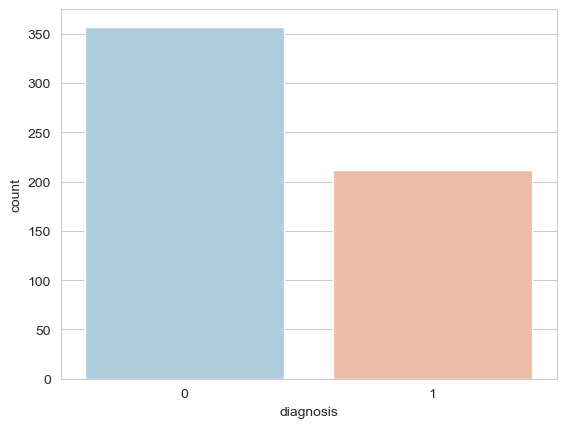

In [6]:
sns.set_style("whitegrid")
sns.countplot(x='diagnosis',data=c_data,palette='RdBu_r')

Text(0.5, 0, 'age')

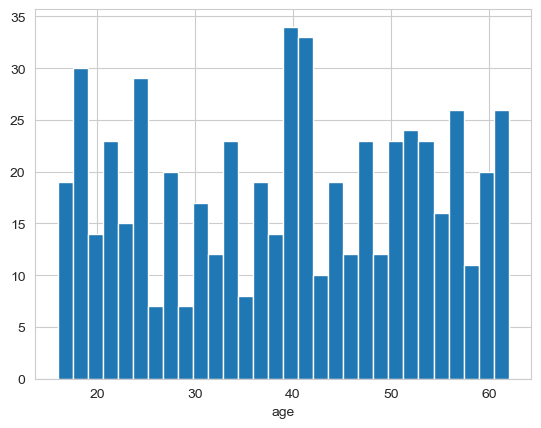

In [7]:
sns.set_style('whitegrid')
c_data['age'].hist(bins=30)
plt.xlabel('age')

<AxesSubplot:xlabel='diagnosis', ylabel='perimeter'>

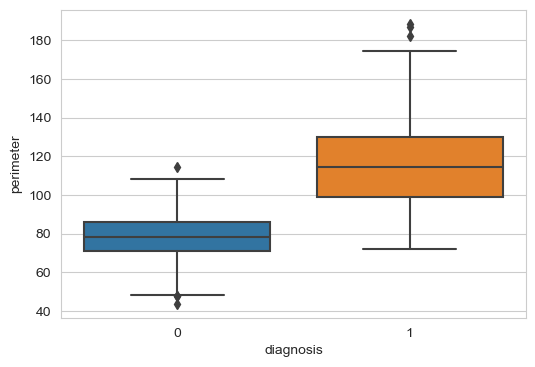

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(x="diagnosis",y="perimeter",data=c_data)

<AxesSubplot:xlabel='diagnosis', ylabel='fractal_dimension'>

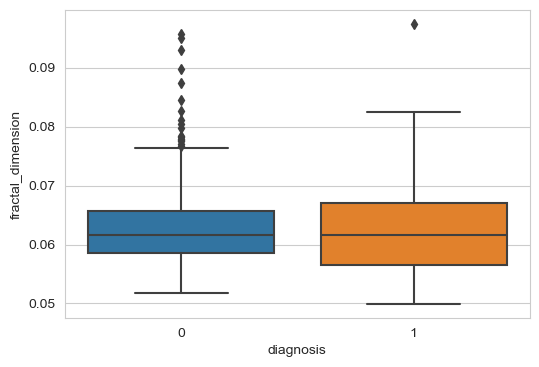

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x="diagnosis",y="fractal_dimension",data=c_data)

**Create a simple heatmap to see how much missing data there is!'**

<AxesSubplot:>

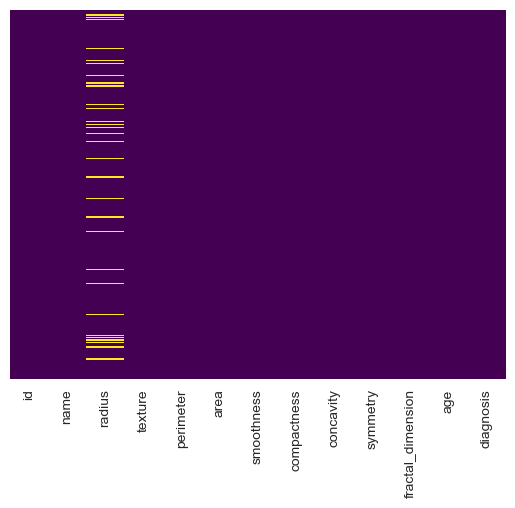

In [10]:
sns.heatmap(c_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
c_data.corr()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
radius,1.000000,0.313243,0.998669,0.988500,0.261659,0.658482,0.804016,0.206431,-0.308220,-0.054169,0.760008
texture,0.313243,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.071401,-0.076437,-0.075189,0.415185
perimeter,0.998669,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.183027,-0.261477,-0.042328,0.742636
area,0.988500,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.151293,-0.283110,-0.040820,0.708984
smoothness,0.261659,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.557775,0.584792,0.051198,0.358560
compactness,0.658482,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.602641,0.565369,0.013898,0.596534
concavity,0.804016,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.500667,0.336783,-0.018575,0.696360
symmetry,0.206431,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,1.000000,0.479921,0.047098,0.330499
fractal_dimension,-0.308220,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.479921,1.000000,0.080118,-0.012838
age,-0.054169,-0.075189,-0.042328,-0.040820,0.051198,0.013898,-0.018575,0.047098,0.080118,1.000000,-0.065279


We can calculate the radius information using perimeter in a function

In [12]:
def impute_age(cols):
    radius=cols[0]
    perimeter=cols[1]
    
    if pd.isnull(radius):
        return perimeter/(2*3.14)
    else:
        return radius

In [13]:
c_data["radius"]=c_data[["radius","perimeter"]].apply(impute_age,axis=1)

## Train/Test Split

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
c_data.columns

Index(['id', 'name', 'radius', 'texture', 'perimeter', 'area', 'smoothness',
       'compactness', 'concavity', 'symmetry', 'fractal_dimension', 'age',
       'diagnosis'],
      dtype='object')

In [16]:
X = c_data[['radius', 'texture', 'perimeter', 'area', 'smoothness',
       'compactness', 'concavity', 'symmetry', 'fractal_dimension', 'age']]
y = c_data['diagnosis']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Algorithm Setup

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logmodel = LogisticRegression(max_iter=400)

The max_iter parameter in the LogisticRegression model specifies the maximum number of iterations for the solvers to converge. Logistic regression models in scikit-learn use optimization algorithms to find the best parameters (coefficients) that minimize a cost function. These optimization algorithms iteratively adjust the coefficients to reduce the difference between the predicted and actual values. The max_iter parameter controls how many iterations of this optimization process are allowed before the algorithm is forced to stop.

The default value is 100 and depending on the dataset, 100 might not be enough, that's why we might need to increase. 

## Model Training

In [20]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=400)

## Model Testing
**Now predict values for the testing data.**

In [21]:
predictions = logmodel.predict(X_test)

## Evaluation

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        89
           1       0.91      0.94      0.93        54

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [24]:
print(confusion_matrix(y_test, predictions))

[[84  5]
 [ 3 51]]


The confusion matrix is interpreted as below:

|                |  Predicted Benign | Predicted Malignant | Total |
|----------------|-------------------  | -------------------| ----- |
| True Benign    | 84  | 5  | 89  |
| True Malignant | 3  | 51 | 54  |
| Total          | 87 | 56 | 143 |

There are 143 subjects in the test dataset, among which 89 are benign, 54 are malignant.\
The predicted result includes 87 predicted benign, and 56 predicted malignant.


In a model that can be used to automatically analyze images and alert the patient to see a doctor, it is preferable to have a higher recall while the precision may not be critical. Currently, 3 "True Malignant" tumors are being predicted as benign - which could mean life or death in this scenario. 